# Estructuras de Datos
## Lab 6
Preguntas al teams:

Vicente Lermanda Candia 🧑

08/05/2023

## Priority Queue 🛒

### Least-first-out
<div>
<img src=https://cdn.programiz.com/sites/tutorial2program/files/Introduction.png width="400" height="300" align="right">
</div>



- Ya se vio que el stack sigue la metodología LIFO.
- Queue sigue metodología FIFO.
- La cola de prioridad se rige por que elemento es más pequeño o más grande.
- Pero, qué significa ser más grande o más pequeño? (sin mucha rigurosidad matemática)
  - Estructura utilizada en conjuntos ordenados (enteros, carácteres, etc).
  - Ejemplo de conjunto no ordenado: números complejos ($\mathbb{C}$).
  - Se pueden definir comparadores (Ej. $return\; popcount(x) > popcount(y)$)
- Para este laboratorio, se considerará que el elemento más pequeño será el primero en salir.


### Priority Queue ADT

In [ ]:
class PriorityQueueADT:
  def top(self, val) -> int:
    pass
  def push(self):
    pass
  def pop(self):
    pass
  def size(self) -> int:
    pass
  def empty(self) -> bool:
    pass

- Recordar que un ADT solo es el "contrato" de métodos y propiedades. No restringe implementación.
- Así mismo, se pide realizar dos implementaciones de este ADT. Ambos pueden llamarse Priority Queue por más que difieran en implementación.
- Basado en vector y basado en heap.
- Irónicamente, en realidad ambos están basados en vector (spoiler).

## Binary Tree 🎄

- Abreviado BT.


> > 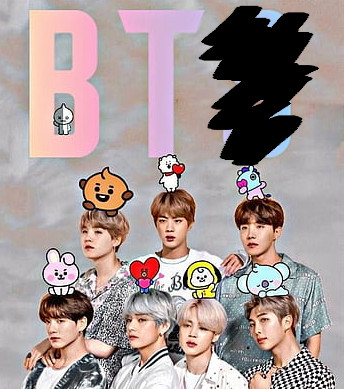








- Árbol donde cada nodo posee como máximo, 2 hijos.
- Qué implicancias tiene esta característica?
  - A diferencia de un árbol general, ya no es necesario mantener una cantidad arbitraria de hijos con, por ejemplo, un vector.
  - Buscar cualquier nodo en el árbol tiene una complejidad de $O(\log n)$.
- Considerar que bajo estas condiciones, una linked list también sería considerara un árbol binario 🤔.
- Podemos agregar propiedades o condiciones que mejoren la estructura de árbol?

## Heap ⛰

- Corresponde a un árbol binario *completo*.
  - Todos los nodos del árbol, exeptuando el último nivel ($h - 1$), deben tener ambos hijos.
  - Los hijos se "llenan" de izquierda a derecha.
  <div>
<img src=https://web.cecs.pdx.edu/~sheard/course/Cs163/Graphics/CompleteBinary.jpg width="400" height="300">
</div>
  

- Heap-order.
  - Para cada nodo $n$, $\;valor(n) \leq valor(parent(n))$ (min-heap).
<div>
<img src=https://miro.medium.com/max/442/0*o4Uh6ggzDmggIArZ.png width="400" height="300">
</div>

- La magia de ser un árbol binario completo, es que permite representar el heap a través de un arreglo. Cómo?...
  - Con...   
<div>
<img src=https://gigistick.cl/wp-content/uploads/sticks/pop/bob-imaginacion-texto-1-600x402.png width="400" height="300">
</div> 

- Representamos nuestro nodo raíz como nuestro primer elemento del arreglo (por simplicidad ignoramos el índice 0), $\;root = arr[1]$.
- Entonces, para cualquier nodo $n$, su hijo izquierdo se encuentra en la posición $2\cdot n$ y el hijo derecho en la posición $2 \cdot n + 1$.
- Recordando que la división en $C++$ y en Python es entera, el padre para cualquier nodo $n > 1$, se encuentra en la posición $n/2$.

<div>
<img src=https://www.andrew.cmu.edu/course/15-121/lectures/Binary%20Heaps/pix/complete.bmp width="400" height="300">
</div> 


In [ ]:
import array

# Movimientos
def leftChild(n):
  return n*2
def rightChild(n):
  return n*2 + 1
def parent(n):
  return n/2

# Recorrido recursivo desde un nodo hasta una hoja por un camino arbitrario (por la izq).
def path(node, arr):
  if node > len(arr):
    return False
  print(arr[node])
  if leftChild(node) <= len(arr):
    path(leftChild(node), arr)
  return True

In [ ]:
arr = array.array('i', [-1, 1, 2, 3, 4, 5]) #ignoramos indice 0
path(1, arr)

1
2
4


True

### Operaciones 🛠

#### Push
- Dada las características del Heap, ingresar un elemento es tan sencillo como hacer $push\;back$.
- Sin embargo, se debe tener en consideración que la propiedad del heap se mantenga.
  - Esto se resuelve con la operación $upheap$

##### Upheap
- Dado que se acaba de ingresar un elemento, conocemos su posición $i$.
- A partir de $i$, debemos verificar la propiedad de heap, y modificar los elementos si esto no se cumple.
- Si $\;arr[parent(i)] > arr[i]$, entonces, intercambiar los nodos de posición.
<div>
<img src=https://upload.wikimedia.org/wikipedia/commons/1/17/Dsa_binary_heap_push.png width="450" height="350">
</div> 


#### Pop
- Se debe ser cuidadoso con esta operación.
- Se intercambia el nodo raíz (el nodo de menor valor), con el último nodo ingresado.
- Luego, se reduce en 1 el tamaño ("imaginario") del Heap.
- Por más que el elemento siga existiendo y usando memoria, al no estar considerado dentro del tamaño del heap, ningún método lo utilizará ni será perjudicado.
  - Más aún, será sobreescrito por otro valor la próxima vez que se haga $push$ (considerar esto a la hora de implementar el método).
- Para preservar la propiedad de Heap, se ejecuta el método $downheap$.

##### Downheap

- Partimos desde el nodo raíz.
- Si algun caso de los siguientes ocurre para el nodo de la posición $i$,
  - $arr[i] > arr[leftChild(i)]$
  - $arr[i] > arr[rightChild(i)]$
- El nodo $arr[i]$ se intercambia por el nodo hijo de menor valor.
- Repetir hasta que la propiedad de Heap se cumpla, o ya no queden más nodos hijos.
<div>
<img src=https://upload.wikimedia.org/wikipedia/commons/c/c8/Dsa_binary_heap_pop.png width="450" height="350">
</div>


#### 🙂
> El resto de operaciones será dejada como ejercicio para el estudiante.

## Ordenamiento ⚡

Si quisieramos utilizar una PQ para ordenar una lista de valores, dependiendo como esté implementado, estaremos utilizando alguno de los siguientes algoritmos.

### Insertion sort
- Se va escogiendo el elemento menor en cada iteración y se ubica al comienzo del arreglo ordenado.
- Los elementos menores se obtienen del arreglo desordenado.
- Complejidad temporal de $O(n^2)$.

### Heap sort
- Se va escogiendo el elemento menor en cada iteración y se ubica al comienzo del arreglo ordenado.
- Los elementos menores se obtienen a través de un heap.
- Complejidad temporal de $O(log\;n)$.

### Implementación

La implementación será la misma para ambas, lo único que cambia es el como se implementó la clase PQ.

In [ ]:
def uwuSort(arr, PQ):

  # Llenamos el Priority Queue
  while (len(arr) > 0):
    PQ.push(arr.pop()) #el pop del array de python si retorna el elemento

  # Ordenamos
  while (PQ.empty() == False):
    arr.append(PQ.top())
    PQ.pop()

## Enlaces útiles
- En este punto comienza a ser más complicado imaginarse el funcionamiento de las ED.
- Árbol == arreglo? Cómo? 🥲
- Visualización e información acerca de EDs:

  - https://visualgo.net/en